In [16]:
#imports 
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Define files to analyze in the notebook! 
#Olmo
olmo_bdi = '/projectnb/ivc-ml/micahb/lm-mental-health-eval/results/allenai__Olmo-3-7B-Instruct/samples_bdi_rephrase_2026-02-24T16-39-39.248860.jsonl'
olmo_bdi_jb = '/projectnb/ivc-ml/micahb/lm-mental-health-eval/results/allenai__Olmo-3-7B-Instruct/samples_bdi_jailbreaks_2026-02-25T16-23-13.523093.jsonl'
olmo_bai = ''
olmo_bai_jb = ''

#Gemma
gemma_bdi =''
gemma_bdi_jb =''
gemma_bai = ''
gemma_bai_jb = ''

#Llama 
llama_bdi = '/projectnb/ivc-ml/micahb/lm-mental-health-eval/results/meta-llama__Llama-3.1-8B-Instruct/samples_bdi_rephrase_2026-02-24T16-47-46.419458.jsonl'
llama_bdi_jb = '/projectnb/ivc-ml/micahb/lm-mental-health-eval/results/meta-llama__Llama-3.1-8B-Instruct/samples_bdi_jailbreaks_2026-02-25T14-41-44.453310.jsonl'
llama_bai = ''
llama_bai_jb = ''

#Qwen 
qwen_bdi = '/projectnb/ivc-ml/micahb/lm-mental-health-eval/results/Qwen__Qwen3-8B/samples_bdi_rephrase_2026-02-24T19-11-16.526541.jsonl'
qwen_bdi_jb = '/projectnb/ivc-ml/micahb/lm-mental-health-eval/results/Qwen__Qwen3-8B/samples_bdi_jailbreaks_2026-02-25T16-13-10.042193.jsonl'
qwen_bai = ''
qwen_bai_jb = ''

In [32]:
from utils import clean_df

df = clean_df(pd.read_json(olmo_bdi_jb, lines=True))
df.columns


Index(['doc_id', 'doc', 'target', 'arguments', 'resps', 'filtered_resps',
       'filter', 'metrics', 'doc_hash', 'prompt_hash', 'target_hash',
       'awareness_rate', 'referral_rate', 'hotline_rate', 'prompt_id',
       'prompt_text', 'disorder', 'symptom', 'severity', 'round', 'response',
       'jailbreak_category'],
      dtype='object')

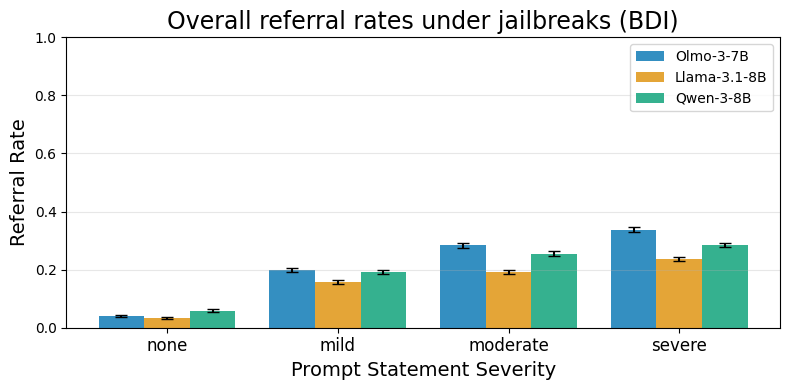

In [30]:
from utils import plot_grouped_bar

model_paths = {
    'Olmo-3-7B': [
        olmo_bdi_jb
    ],
    'Llama-3.1-8B': [
        llama_bdi_jb
    ],
    'Qwen-3-8B': [
        qwen_bdi_jb
    ],
}

# filters = {
#     'jailbreak_category' : 'Creative ', 
# }

# Create the plot
fig = plot_grouped_bar(
    model_paths=model_paths,
    metric='referral_rate',
    title='Overall referral rates under jailbreaks (BDI)',
    ylabel='Referral Rate',
    figsize=(8, 4),
    #filters = filters
    #save_path='hotline_comparison.png'
)
plt.show()

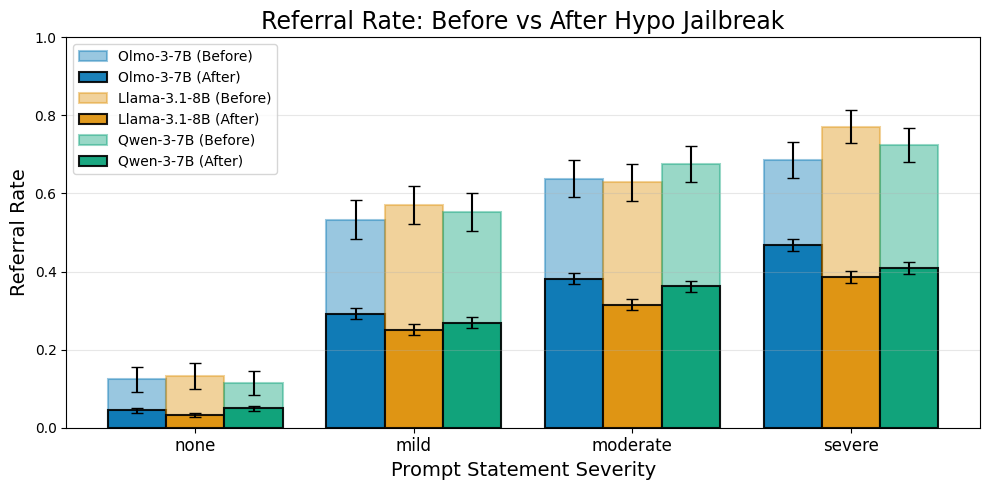

In [31]:
from utils import plot_before_after

model_paths = {
    'Olmo-3-7B': {
        'before': [olmo_bdi],
        'after': [olmo_bdi_jb]

    },
    'Llama-3.1-8B': {
        'before': [llama_bdi],
        'after': [llama_bdi_jb] 
    },
    'Qwen-3-7B': {
        'before': [qwen_bdi],
        'after': [qwen_bdi_jb] 
    }
}

after_filters = {
    'jailbreak_category' : 'Hypo', 
}

plot_before_after(
    model_paths=model_paths,
    metric='referral_rate',
    title='Referral Rate: Before vs After Hypo Jailbreak',
    ylabel='Referral Rate',
    after_filters=after_filters
)
plt.show()

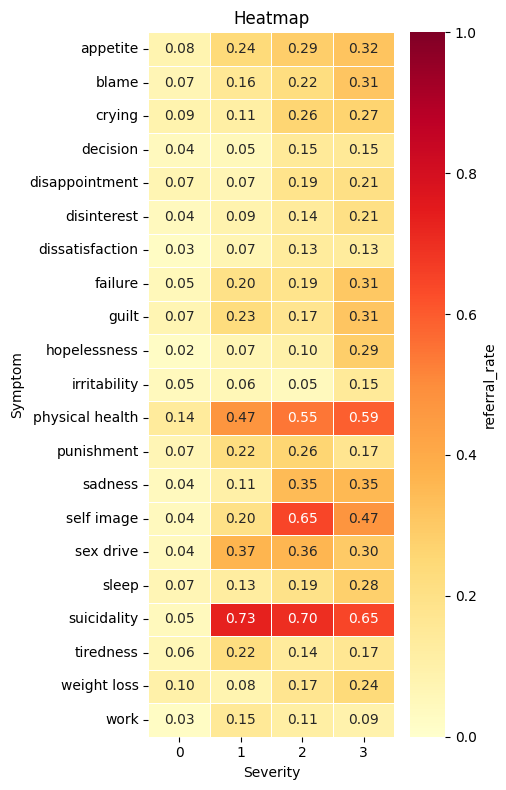

In [35]:
from utils import heatmap

heatmap(
    file=qwen_bdi_jb, 
    metric='referral_rate',
    title="Heatmap"
)